In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("Expri_Dataset.csv")

In [5]:
data.info

<bound method DataFrame.info of            A1        A2        A3        A4        A5        A6        A7  \
0    0.000286  1.519145  0.000887  1.795573  0.000060  1.035119  0.001943   
1    0.000201  1.396803  0.000802  1.506190  0.000048  0.865181  0.001421   
2    0.000245  1.505849  0.000824  1.721787  0.000055  1.001181  0.001641   
3    0.000213  1.510623  0.000759  2.028541  0.000049  0.984888  0.001457   
4    0.000251  1.542969  0.000923  2.005357  0.000068  1.021463  0.001600   
..        ...       ...       ...       ...       ...       ...       ...   
645  0.000348  1.375608  0.001273  1.476096  0.000055  0.919415  0.002721   
646  0.000311  1.402979  0.001194  2.121500  0.000050  0.915146  0.002416   
647  0.000184  1.270564  0.000623  1.818428  0.000032  0.780633  0.001301   
648  0.000175  1.188100  0.000568  1.403224  0.000032  0.716317  0.001271   
649  0.000319  1.264524  0.000930  1.546844  0.000046  0.842220  0.002275   

           A8        A9       A10       A11

In [6]:
from sklearn.preprocessing import Normalizer


In [7]:
x = data.iloc[: , :-1]
y = data.iloc[: , -1]

In [9]:
x.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,0.000286,1.519145,0.000887,1.795573,0.000060,1.035119,0.001943,2.353083,0.007488,2.506212,0.000891,1.878569,2.574750,1.922121
1,0.000201,1.396803,0.000802,1.506190,0.000048,0.865181,0.001421,2.245061,0.007157,2.171035,0.000734,1.679726,1.770226,2.034724
2,0.000245,1.505849,0.000824,1.721787,0.000055,1.001181,0.001641,2.276966,0.007108,2.400657,0.000836,1.834776,1.782286,1.746936
3,0.000213,1.510623,0.000759,2.028541,0.000049,0.984888,0.001457,2.341665,0.006437,2.989322,0.000662,1.861950,1.793722,2.117791
4,0.000251,1.542969,0.000923,2.005357,0.000068,1.021463,0.001600,2.333618,0.007113,2.846943,0.000853,1.882261,1.908964,2.109222


In [11]:
norm = Normalizer()
columns = x.columns
x_norm = norm.fit_transform(x)
x_norm = pd.DataFrame(x_norm, columns = columns)
x_norm.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,0.000050,0.267405,0.000156,0.316063,0.000011,0.182205,0.000342,0.414198,0.001318,0.441152,0.000157,0.330672,0.453217,0.338339
1,0.000040,0.280387,0.000161,0.302345,0.000010,0.173672,0.000285,0.450663,0.001437,0.435803,0.000147,0.337180,0.355347,0.408441
2,0.000047,0.291005,0.000159,0.332735,0.000011,0.193478,0.000317,0.440023,0.001374,0.463926,0.000161,0.354570,0.344426,0.337595
3,0.000037,0.263142,0.000132,0.353360,0.000009,0.171562,0.000254,0.407905,0.001121,0.520723,0.000115,0.324341,0.312456,0.368907
4,0.000044,0.270105,0.000161,0.351049,0.000012,0.178813,0.000280,0.408512,0.001245,0.498373,0.000149,0.329500,0.334175,0.369231


In [12]:
x.corr().style.background_gradient(cmap = 'coolwarm')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
A1,1.000000,0.238220,0.705996,0.303141,0.541726,0.385691,0.974378,0.206246,0.724081,0.204572,0.674070,0.259264,0.624936,-0.326335
A2,0.238220,1.000000,0.093167,0.569815,0.356325,0.916057,0.153431,0.967330,0.018402,0.328073,0.282618,0.964187,-0.010531,-0.057861
A3,0.705996,0.093167,1.000000,0.328473,0.774930,0.263304,0.757491,0.108640,0.978597,0.302312,0.928737,0.120784,0.453465,-0.367550
A4,0.303141,0.569815,0.328473,1.000000,0.239546,0.534271,0.286697,0.564915,0.322779,0.954017,0.268651,0.562011,0.175144,-0.023571
A5,0.541726,0.356325,0.774930,0.239546,1.000000,0.562737,0.500247,0.297979,0.643987,0.122940,0.890436,0.398110,0.218935,-0.400575
A6,0.385691,0.916057,0.263304,0.534271,0.562737,1.000000,0.280017,0.825630,0.166770,0.284667,0.482357,0.950104,0.145363,-0.279865
A7,0.974378,0.153431,0.757491,0.286697,0.500247,0.280017,1.000000,0.147560,0.804031,0.216869,0.675404,0.155238,0.660529,-0.320460
A8,0.206246,0.967330,0.108640,0.564915,0.297979,0.825630,0.147560,1.000000,0.050516,0.346484,0.262857,0.896947,0.005174,-0.038887
A9,0.724081,0.018402,0.978597,0.322779,0.643987,0.166770,0.804031,0.050516,1.000000,0.319546,0.859540,0.035254,0.518184,-0.344074
A10,0.204572,0.328073,0.302312,0.954017,0.122940,0.284667,0.216869,0.346484,0.319546,1.000000,0.176222,0.312110,0.140353,0.049379


In [13]:
from sklearn.decomposition import PCA 
pca = PCA (n_components = 2)
pca.fit(x_norm)
x_pca = pca.transform(x_norm)

x_pca = pd.DataFrame(x_pca, columns = ['Feature_1', 'Feature_2'])
x_pca.head()

,Feature_1,Feature_2
0,-0.045202,-0.011833
1,0.076973,0.002219
2,0.051473,-0.078121
3,0.093957,-0.087292
4,0.075173,-0.071447


In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
y= label_encoder.fit_transform(y)
y= pd.DataFrame (y, columns = ['Target'])

<AxesSubplot:xlabel='Feature_1', ylabel='Feature_2'>

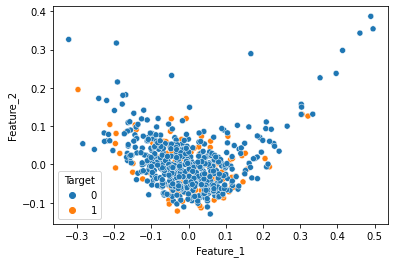

In [16]:
x_pca = pd.concat([x_pca, y], axis = 1)
sns.scatterplot(data = x_pca, x='Feature_1', y='Feature_2', hue = 'Target') 

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_pca, x_pca[ 'Target'], test_size=0.3, random_state=0)


In [26]:
from sklearn.svm import SVC

#Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma =1, probability=True)
svc_model.fit(X_train, y_train)
prediction=svc_model .predict(X_test) 
#check the accuracy on the training set 
print(svc_model.score (X_train, y_train)) 
print(svc_model.score (X_test, y_test))

1.0
1.0


Confusion matrix, without normalization
[[151   0]
 [  0  44]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


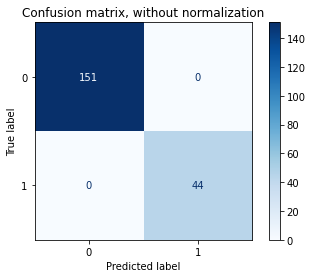

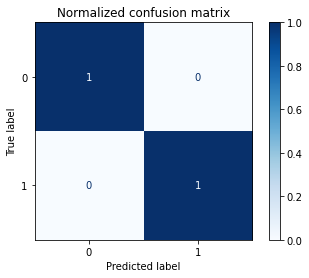

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay 
np.set_printoptions (precision=2)
# Plot non-normalized confusion matrix

titles_options= [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
        disp= ConfusionMatrixDisplay.from_estimator ( 
            svc_model,
            X_test, 
            y_test, 
            cmap= plt.cm.Blues, 
            normalize=normalize,
        )

        disp.ax_.set_title(title)

        print(title)

        print (disp.confusion_matrix)

plt.show()

In [37]:
pred_prob= svc_model.predict_proba (X_test)
from sklearn.metrics import roc_curve
#roc curve for models
fpr1, tpr1, thresh1 =roc_curve (y_test, pred_prob[:,1], pos_label=1) 
from sklearn.metrics import roc_auc_score
# auc scores
auc_scorel = roc_auc_score (y_test, pred_prob[:,1]) 
auc_scorel

1.0

In [39]:
random_probs = [0 for i in range(len(y_test))] 
p_fpr, p_tpr,_= roc_curve (y_test, random_probs, pos_label=1)


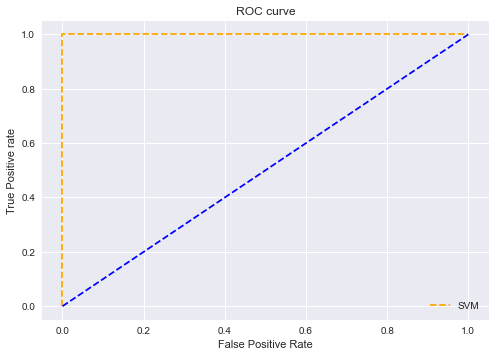

In [42]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM') 
plt.plot(p_fpr, p_tpr, linestyle= '--' ,color='blue')
#title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# #y label
plt.ylabel('True Positive rate')
plt.legend (loc='best')
plt.savefig('ROC',dpi=300)
plt.show();